In [1]:
import numpy as np
import cv2
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pwd = os.getcwd()

In [3]:
path_green = pwd+"/Green" # Path to Green Channel Folder
path_green

'C:\\Users\\ACER\\Documents\\Saquib Sir\\Thresholding_updated\\Thresholding/Green'

In [4]:
# Extract all background reduced images paths with "_saved_bgr.png" extension
images = glob.glob(path_green+"/BGR/*_saved_bgr.png")
images

['C:\\Users\\ACER\\Documents\\Saquib Sir\\Thresholding_updated\\Thresholding/Green/BGR\\10_saved_bgr.png',
 'C:\\Users\\ACER\\Documents\\Saquib Sir\\Thresholding_updated\\Thresholding/Green/BGR\\11_saved_bgr.png',
 'C:\\Users\\ACER\\Documents\\Saquib Sir\\Thresholding_updated\\Thresholding/Green/BGR\\12_saved_bgr.png',
 'C:\\Users\\ACER\\Documents\\Saquib Sir\\Thresholding_updated\\Thresholding/Green/BGR\\13_1_saved_bgr.png',
 'C:\\Users\\ACER\\Documents\\Saquib Sir\\Thresholding_updated\\Thresholding/Green/BGR\\13_2_saved_bgr.png',
 'C:\\Users\\ACER\\Documents\\Saquib Sir\\Thresholding_updated\\Thresholding/Green/BGR\\14_saved_bgr.png',
 'C:\\Users\\ACER\\Documents\\Saquib Sir\\Thresholding_updated\\Thresholding/Green/BGR\\15_1_saved_bgr.png',
 'C:\\Users\\ACER\\Documents\\Saquib Sir\\Thresholding_updated\\Thresholding/Green/BGR\\15_2_saved_bgr.png',
 'C:\\Users\\ACER\\Documents\\Saquib Sir\\Thresholding_updated\\Thresholding/Green/BGR\\16_saved_bgr.png',
 'C:\\Users\\ACER\\Documents\

In [5]:
th = pd.read_csv(pwd+"/threshold_green.csv") # Load Thresholds for Green Channel
th

,Unnamed: 0,min,max,Layer
0,Green,126.0,128.0,Background
1,Green,118.0,122.0,Monolayer
2,Green,114.0,117.0,Bilayer
3,Green,105.0,120.0,Trilayer


In [6]:
mono_min, mono_max = th.iloc[1]['min'], th.iloc[1]['max'] # Range for monolayer
bi_min, bi_max = th.iloc[2]['min'], th.iloc[2]['max']     # Range for bilayer
tri_min, tri_max = th.iloc[3]['min'], th.iloc[3]['max']   # Range for trilayer

In [7]:
# IMAGE SEGMENTATION FUNCTION
def detect(img: np.ndarray):
    # define layer color [r, g, b]
    img_seg = img.copy()
    layer = {
        'mono': [201, 255, 52],
        'bi': [241, 183, 23],
        'tri': [220, 110, 85]
    }
    green_channel = img_seg[:, :, 1] # 0 -> Red, 1 -> Green, 2 -> Blue
    row, col = green_channel.shape
    for r in range(row):
        for c in range(col):
            pixel_val = green_channel[r, c] # extract pixel value
            # identify which layer it is using threshold
            if mono_min <= pixel_val <= mono_max: 
                for i in range(3): img_seg[r, c, i] = layer['mono'][i]  # replace rgb values to monolayer color rgb
            elif bi_min <= pixel_val <= bi_max:
                for i in range(3): img_seg[r, c, i] = layer['bi'][i]    # replace rgb values to bilayer color rgb
            elif tri_min <= pixel_val <= tri_max:
                for i in range(3): img_seg[r, c, i] = layer['tri'][i]   # replace rgb values to trilayer color rgb

    return img_seg

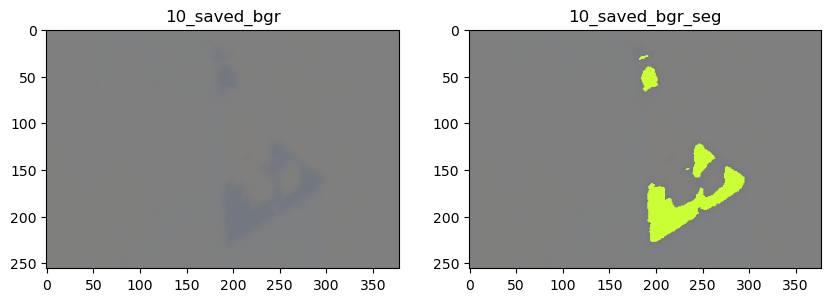

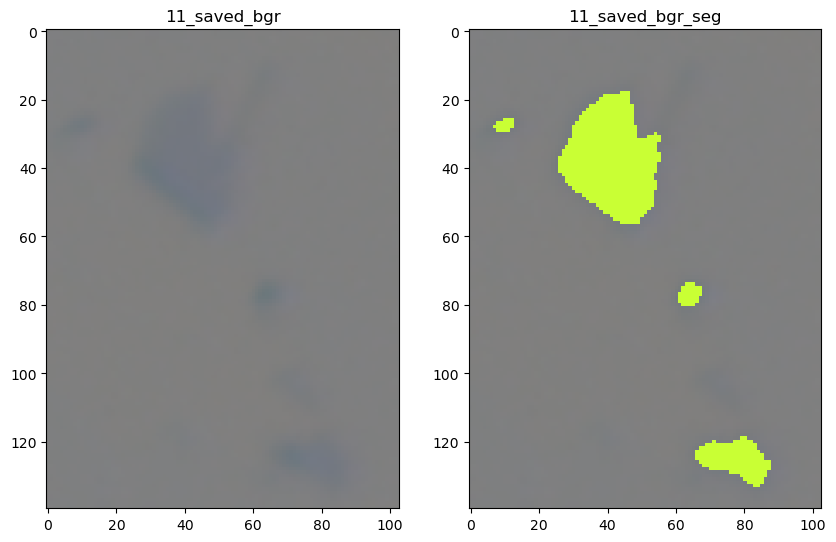

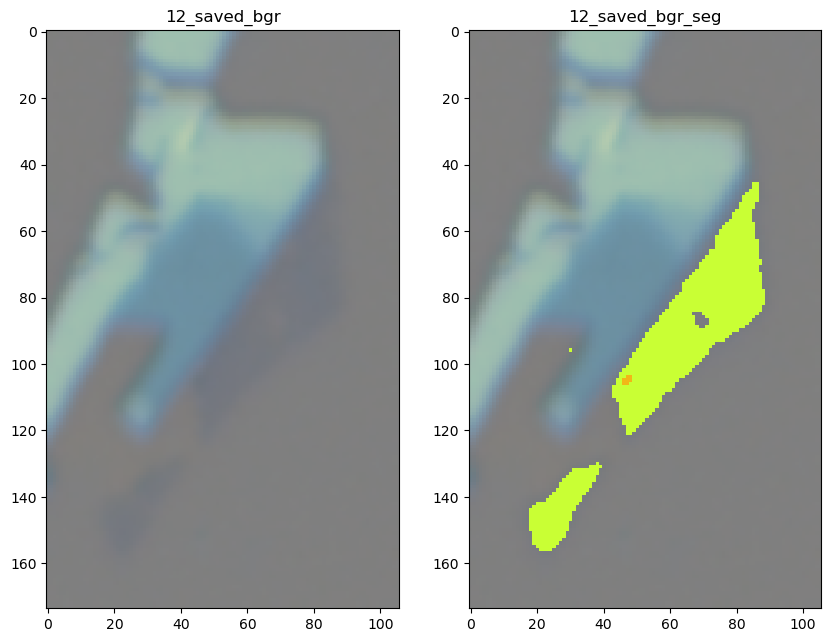

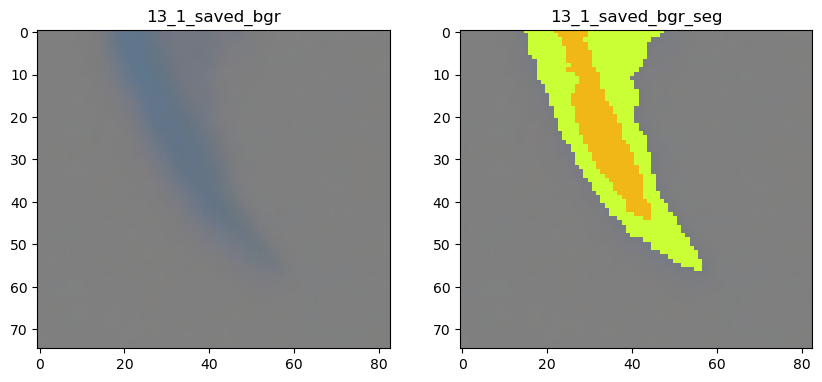

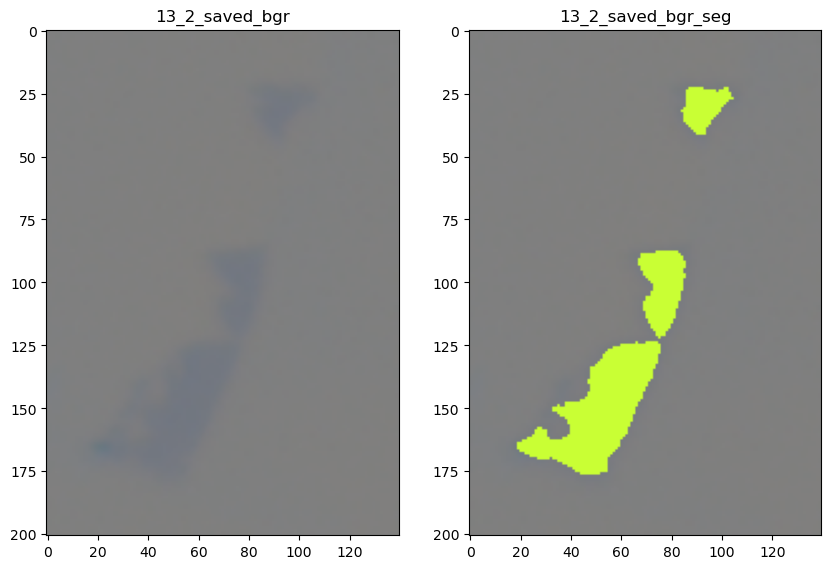

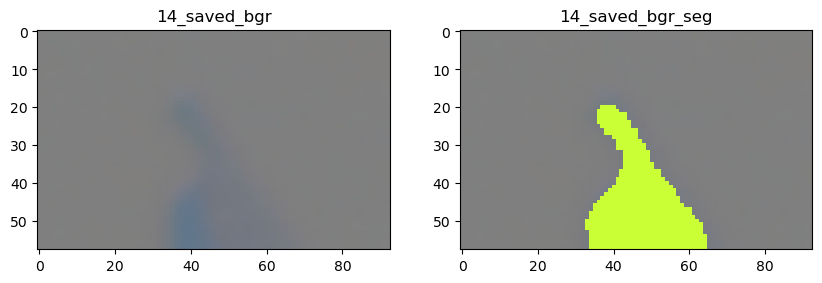

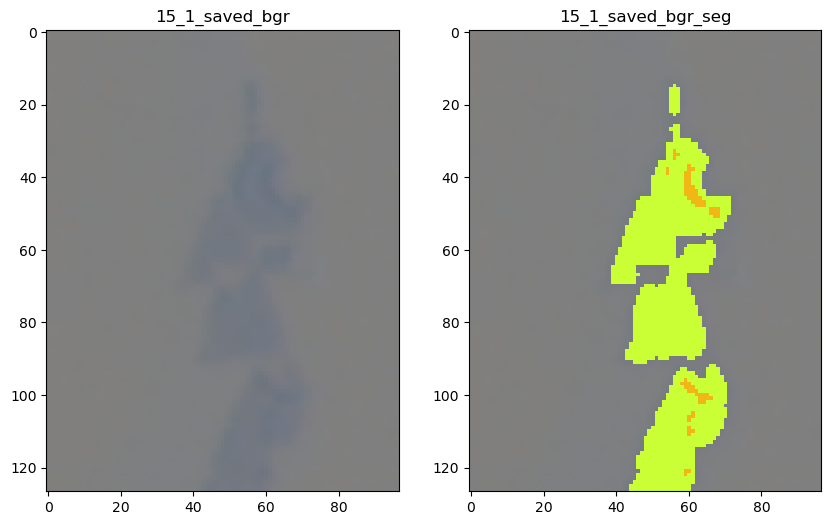

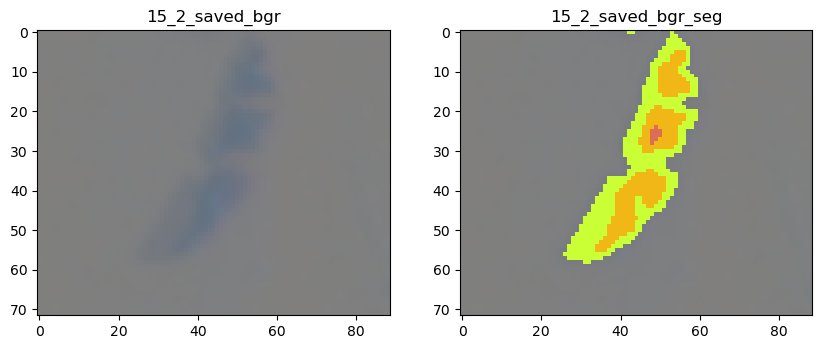

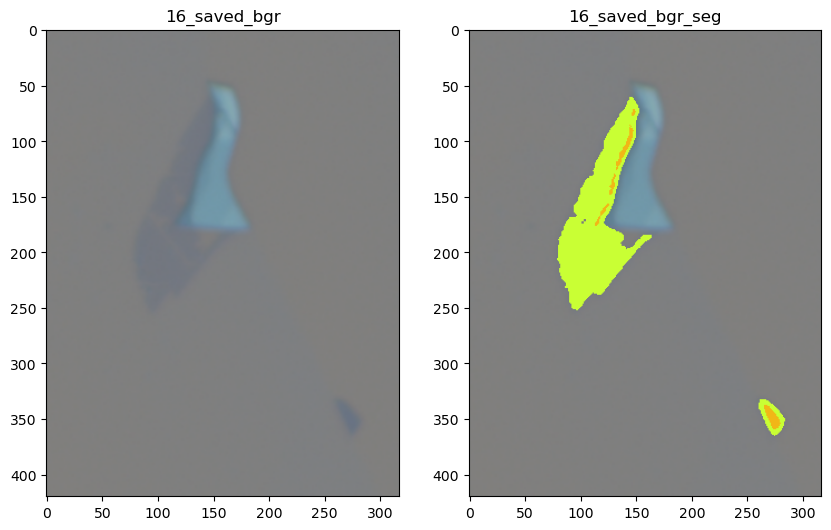

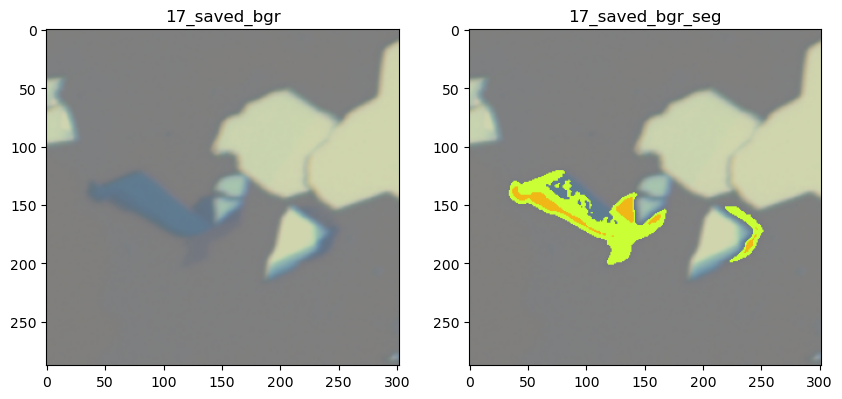

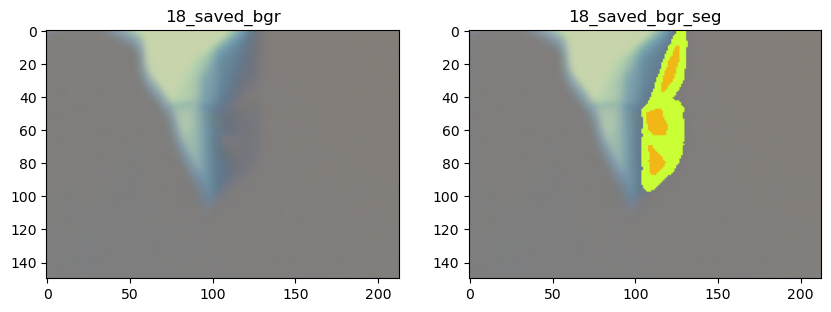

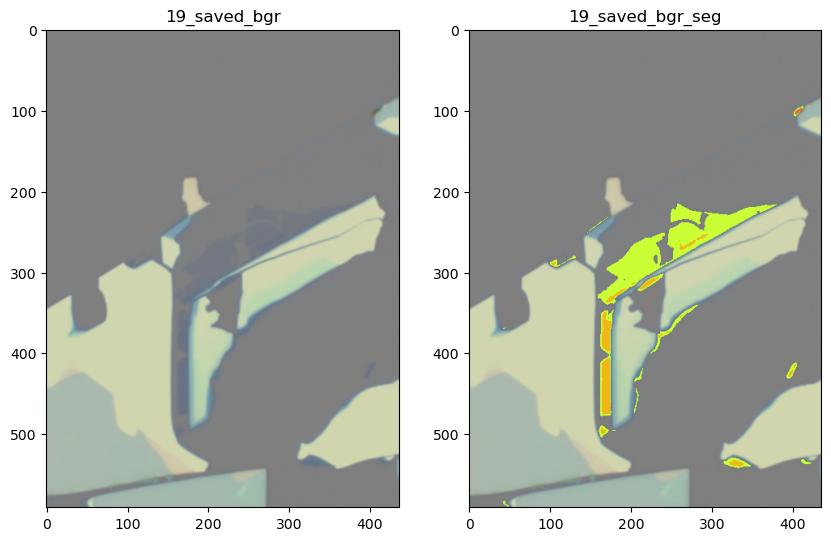

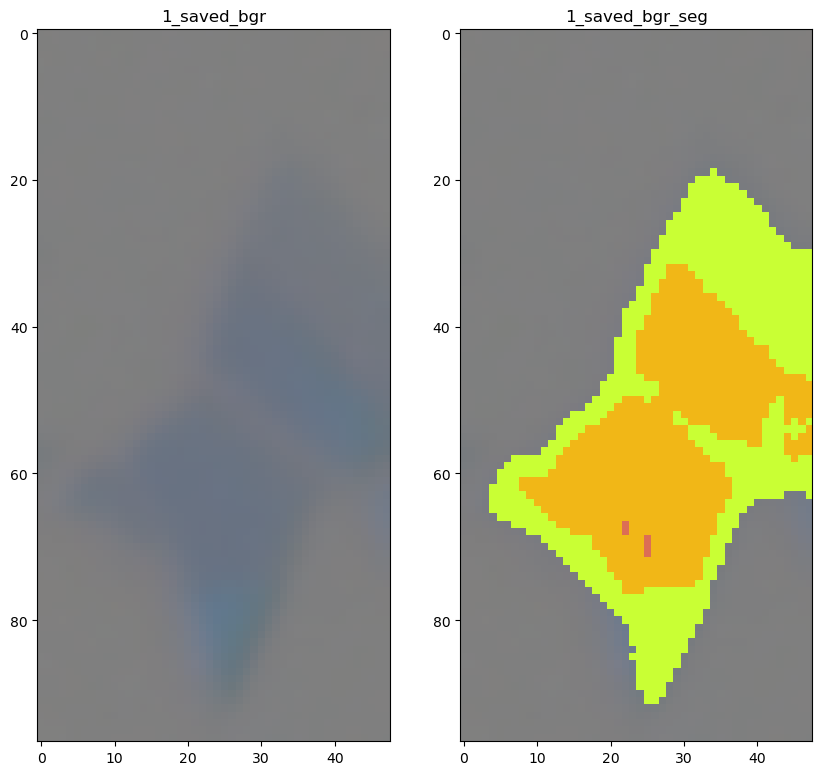

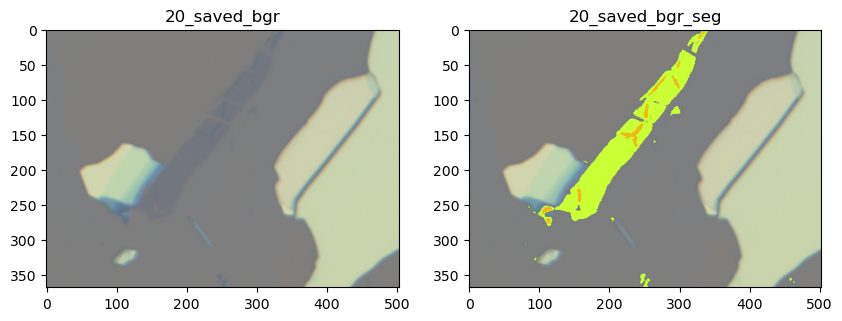

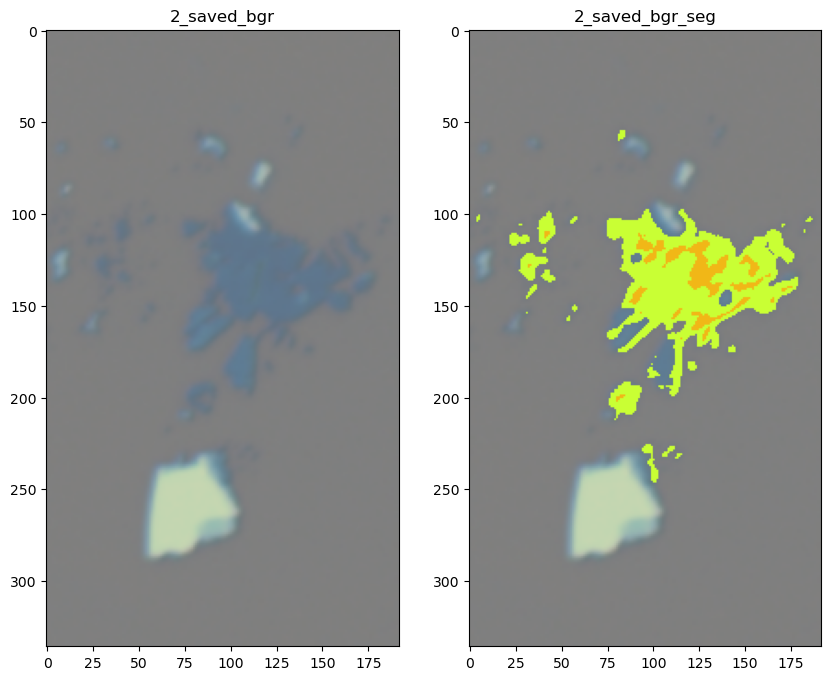

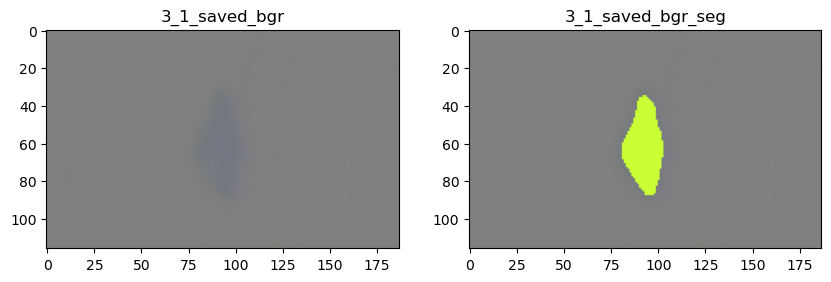

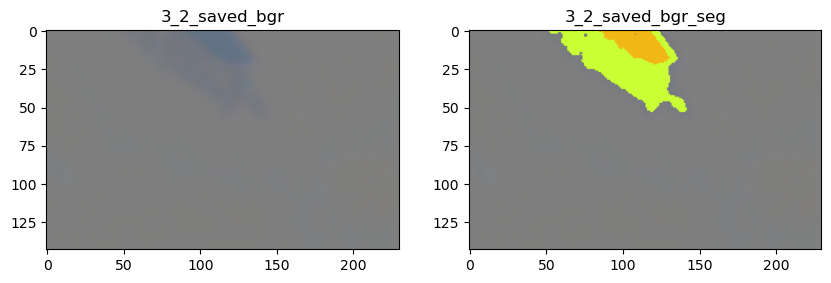

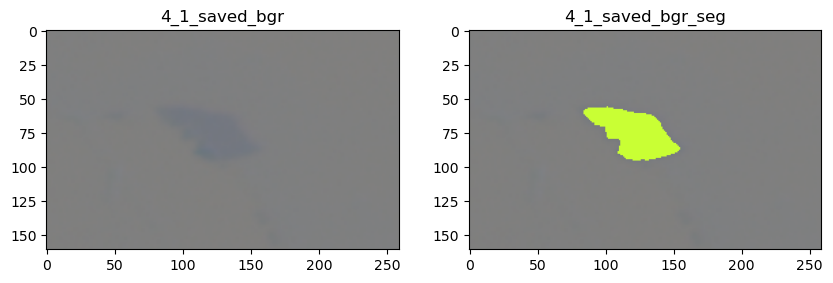

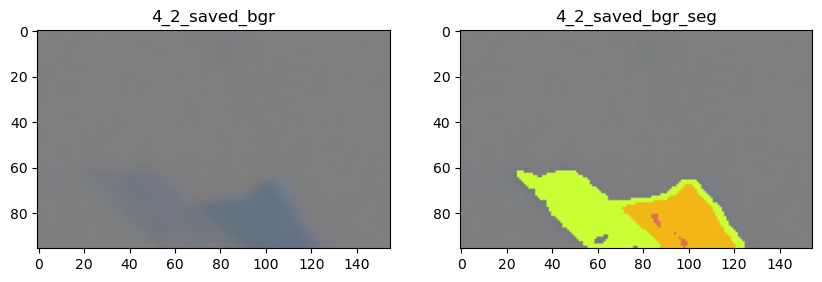

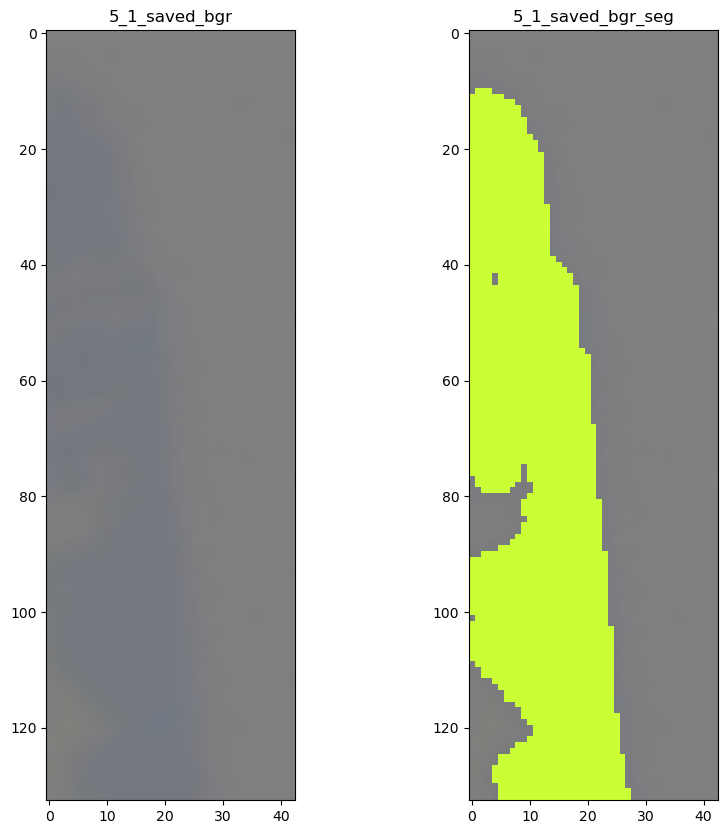

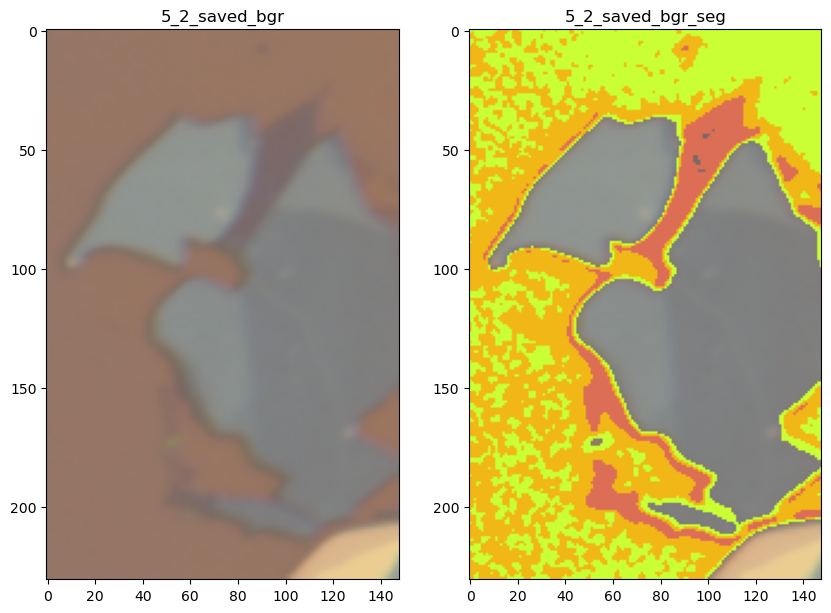

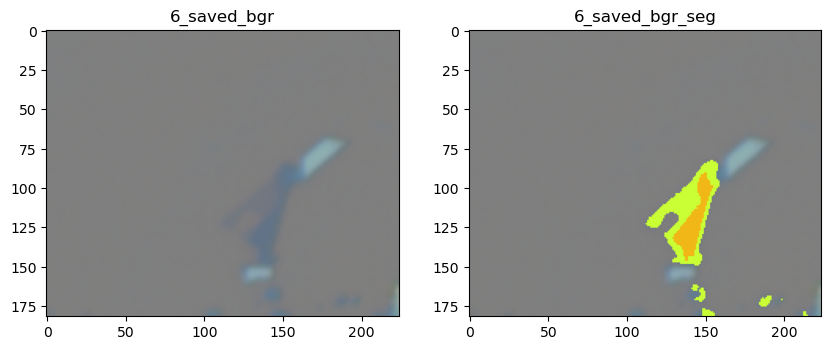

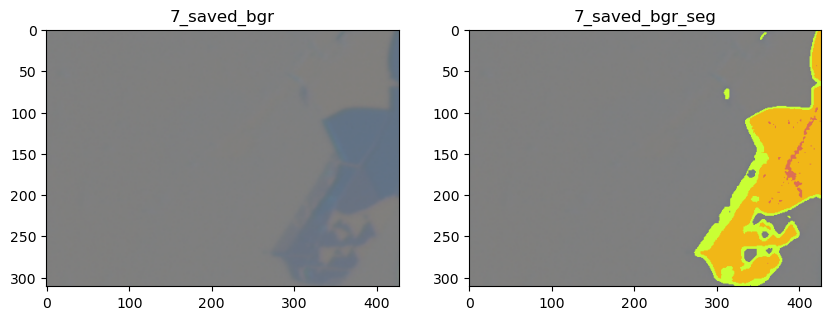

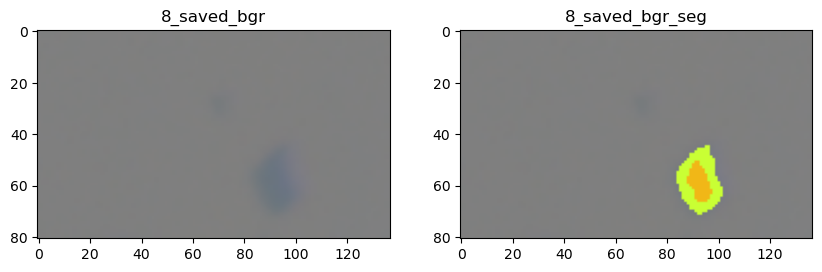

In [10]:
for i in range(len(images)):

    # VISUALIZING THE IMAGE SEGMENTATION
    img_label = images[i].split("\\")[-1].split(".")[0] # Image Label

    # READ IMAGE AND CONVERT IT TO RGB
    img = cv2.imread(images[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # PERFORM SEGMENTATION AND SAVE IMAGE
    img_seg = detect(img)
    save_path = pwd+"/Green/Segmented/"
    cv2.imwrite(save_path+img_label+"_seg.png", cv2.cvtColor(img_seg, cv2.COLOR_RGB2BGR))

    plt.subplots(1, 2, figsize=(10, 10))

    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title(img_label)

    plt.subplot(1, 2, 2)
    plt.imshow(img_seg)
    plt.title(img_label+"_seg")
    plt.show()